In [22]:
from math import pi as PI
import torch
from torch import nn, optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import os
import ast
import matplotlib.ticker as ticker
from plotnine import *

r1=0.135 #内径
r2=0.1695  #外径
h1=0.02  #高

h=20602.3271 #对流换热系数、
#h=200
T0=303.15 #外界温度
k=60 #传热系数
maxf=10 #端面最高温度

heat_fem=pd.read_csv('./heat_forward/data/heat.txt',delimiter=r'\s+')
force_fem=pd.read_csv('./force_forward/data/force.txt',delimiter=r'\s+')
couple_fem=pd.read_csv('./force_forward/data/couple.txt',delimiter=r'\s+')
normal_heat=pd.read_csv('./result/heat/normal/normal_history.txt',delimiter=r'\s+',header=None)
impose_heat=pd.read_csv('./result/heat/impose/impose_history.txt',delimiter=r'\s+',header=None)
mtl_heat=pd.read_csv('./result/heat/mtl/mtl_heat_history.txt',delimiter=r'\s+',header=None)
bound_optim=pd.read_csv('./result/force/new/bound_optim.txt',delimiter=r'\s+',header=None)
new_heat=pd.read_csv('./result/heat/new/new_heat_history.txt',delimiter=r'\s+',header=None)
new_force=pd.read_csv('./result/force/history/force_new_history.txt',delimiter=r'\s+',header=None)
normal_force=pd.read_csv('./result/force/history/force_normal_history.txt',delimiter=r'\s+',header=None)
new_couple=pd.read_csv('./result/force/history/couple_new_history.txt',delimiter=r'\s+',header=None)
normal_couple=pd.read_csv('./result/force/history/couple_normal_history.txt',delimiter=r'\s+',header=None)
normal_inverse_5=pd.read_csv('./result/heat/inverse/normal_5_history.txt',delimiter=r'\s+',header=None)



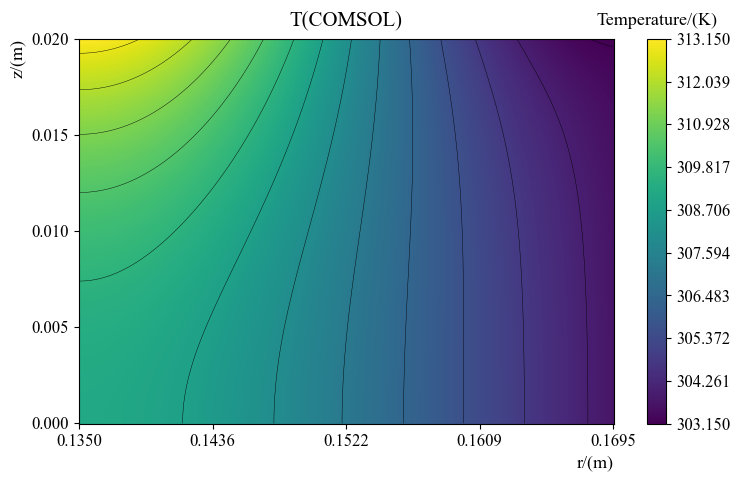

In [15]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=[8.625,5])
check_on_x=torch.linspace(r1, r2, 400)
check_on_y=torch.linspace(0.0, h1, 400)
xx, yy = np.meshgrid(check_on_x, check_on_y)
# 创建热力图
show_array=np.array(heat_fem['T'])
heatmap=plt.pcolormesh(xx, yy,show_array.reshape(xx.shape).T,cmap='viridis')  # cmap是颜色映射，你可以根据需要选择
contour_lines = plt.contour(xx, yy, show_array.reshape(xx.shape).T, 15,colors='black', linewidths=0.3)
# 添加颜色
cbar=plt.colorbar(heatmap)
tick_values = np.linspace(show_array.min(), show_array.max(), 10)
tick_labels = [f'{val:.3f}' for val in tick_values]
# 设置颜色条的刻度值和标签
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_labels,fontsize=12)
cbar.ax.set_title('Temperature/(K)', fontsize=13, pad=10)
cbar.ax.xaxis.set_label_position('top')
# 添加轴标签
plt.xlabel('r/(m)', fontname='Times New Roman',fontsize=13,loc='right')
plt.ylabel('z/(m)', fontname='Times New Roman',fontsize=13,loc='top')
plt.title('T(COMSOL)', fontname='Times New Roman',fontsize=15,pad=10)
plt.xticks(np.linspace(r1, r2, 5), fontname='Times New Roman',fontsize=12)
plt.yticks(np.linspace(0, h1, 5), fontname='Times New Roman',fontsize=12)
ax = plt.gca()  # 获取当前坐标轴
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
plt.savefig('result/heat/comsol/heat_comsol' , dpi=400)

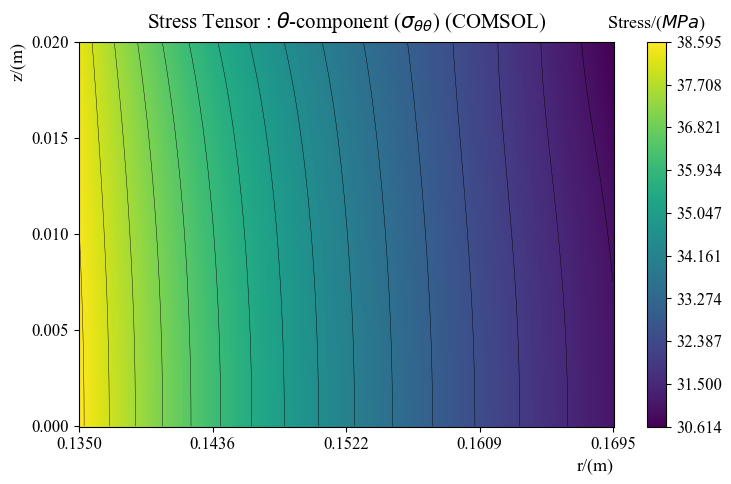

In [39]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=[8.625,5])
check_on_x=torch.linspace(r1, r2, 400)
check_on_y=torch.linspace(0.0, h1, 400)
xx, yy = np.meshgrid(check_on_x, check_on_y)
# 创建热力图
show_array=np.array(force_fem['solid.sphi'])
heatmap=plt.pcolormesh(xx, yy,show_array.reshape(xx.shape).T,cmap='viridis')  # cmap是颜色映射，你可以根据需要选择
contour_lines = plt.contour(xx, yy, show_array.reshape(xx.shape).T, 15,colors='black', linewidths=0.3)
# 添加颜色
cbar=plt.colorbar(heatmap)
tick_values = np.linspace(show_array.min(), show_array.max(), 10)
tick_labels = [f'{val:.3f}' for val in tick_values]
# 设置颜色条的刻度值和标签
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_labels,fontsize=12)
cbar.ax.set_title('Stress/($MPa$)', fontsize=13, pad=10)
cbar.ax.xaxis.set_label_position('top')
# 添加轴标签
plt.xlabel('r/(m)', fontname='Times New Roman',fontsize=13,loc='right')
plt.ylabel('z/(m)', fontname='Times New Roman',fontsize=13,loc='top')
plt.title('Stress Tensor : $\\theta $-component ($\sigma _{\\theta \\theta} $) (COMSOL)', fontname='Times New Roman',fontsize=15,pad=10)
plt.xticks(np.linspace(r1, r2, 5), fontname='Times New Roman',fontsize=12)
plt.yticks(np.linspace(0, h1, 5), fontname='Times New Roman',fontsize=12)
ax = plt.gca()  # 获取当前坐标轴
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
plt.savefig('result/force/comsol/sigma_phi_comsol' , dpi=400)

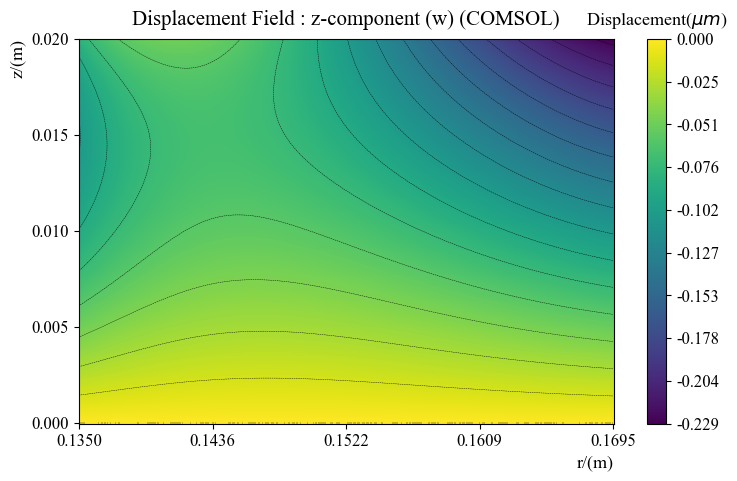

In [53]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=[8.625,5])
check_on_x=torch.linspace(r1, r2, 400)
check_on_y=torch.linspace(0.0, h1, 400)
xx, yy = np.meshgrid(check_on_x, check_on_y)
# 创建热力图
show_array=np.array(couple_fem['w'])
heatmap=plt.pcolormesh(xx, yy,show_array.reshape(xx.shape).T,cmap='viridis')  # cmap是颜色映射，你可以根据需要选择
contour_lines = plt.contour(xx, yy, show_array.reshape(xx.shape).T, 15,colors='black', linewidths=0.3)
# 添加颜色
cbar=plt.colorbar(heatmap)
tick_values = np.linspace(show_array.min(), show_array.max(), 10)
tick_labels = [f'{val:.3f}' for val in tick_values]
# 设置颜色条的刻度值和标签
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_labels,fontsize=12)
cbar.ax.set_title('Displacement($\mu m$)', fontsize=13, pad=10)
cbar.ax.xaxis.set_label_position('top')
# 添加轴标签
plt.xlabel('r/(m)', fontname='Times New Roman',fontsize=13,loc='right')
plt.ylabel('z/(m)', fontname='Times New Roman',fontsize=13,loc='top')
plt.title('Displacement Field : z-component (w) (COMSOL)', fontname='Times New Roman',fontsize=15,pad=10)
plt.xticks(np.linspace(r1, r2, 5), fontname='Times New Roman',fontsize=12)
plt.yticks(np.linspace(0, h1, 5), fontname='Times New Roman',fontsize=12)
ax = plt.gca()  # 获取当前坐标轴
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
plt.savefig('result/couple/comsol/w_comsol' , dpi=400)

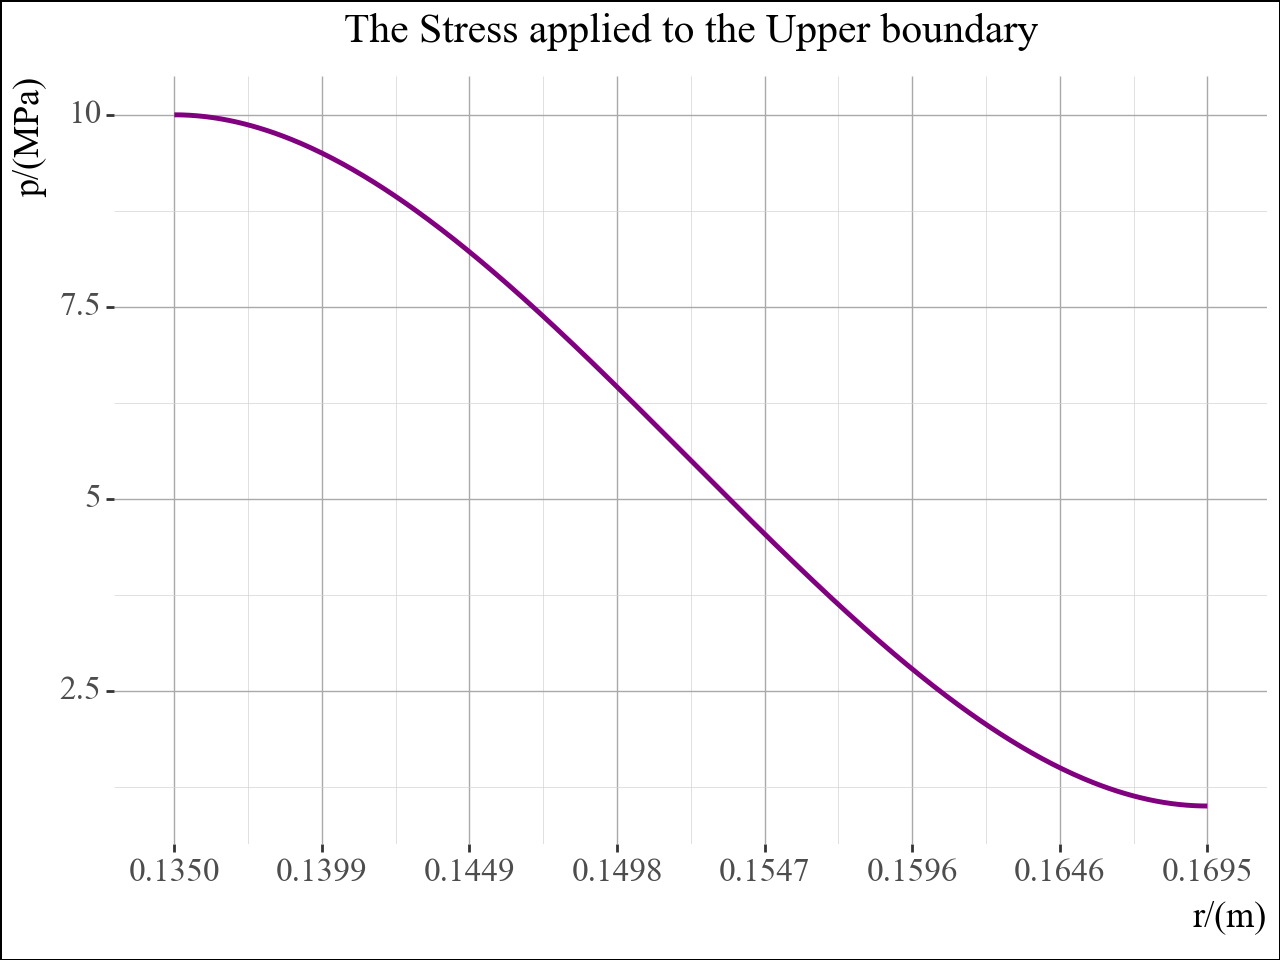

/Users/yst/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 4 in image.
/Users/yst/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ./result/force/up_apply.png


In [21]:

# 创建一些示例数据
rr=(heat_fem['R']-r1)/(r2-r1)
df = pd.DataFrame({
    'x': heat_fem['R'],
    'T': 9*(2*rr**3-3*rr**2+1)+1
})

plot = (ggplot(df, aes('x', 'T')) + 
        geom_line(color='purple',size=1) +  # 绘制散点
        scale_x_continuous(breaks=np.linspace(r1, r2, 8),
                           labels=lambda l: ['{:.4f}'.format(x) for x in l],expand=(0,0.002)) + 
        scale_y_continuous(breaks=np.linspace(0, 10, 5), expand=(0,0.5)) +
        theme(text=element_text(family='Times New Roman'),  # 设置字体为Times New Roman
              plot_background=element_rect(fill='white',color='black'),  # 设置绘图背景为浅灰色
              panel_background=element_rect(fill='white',color='black'),  # 设置面板背景为白色
              panel_grid_major=element_line(color='darkgray', size=0.5),  # 添加并自定义主要网格线
              panel_grid_minor=element_line(color='lightgray', size=0.25),
              plot_title=element_text(ha='center', size=15),  # 设置总标题居中并调整大小
              axis_title_x=element_text(ha='right',size=13),
              axis_title_y=element_text(va='top',size=13),  # 设置坐标轴标题的大小
              axis_text=element_text(size=12))+ 
        labs(title='The Stress applied to the Upper boundary', x='r/(m)', y='p/(MPa)')  
       )

# 显示图形
print(plot)
plot.save(filename='./result/force/up_apply.png', height=4, width=6, units='in', dpi=300)


In [5]:
print(np.min(new_heat[6]))

5.014837177201362e-08


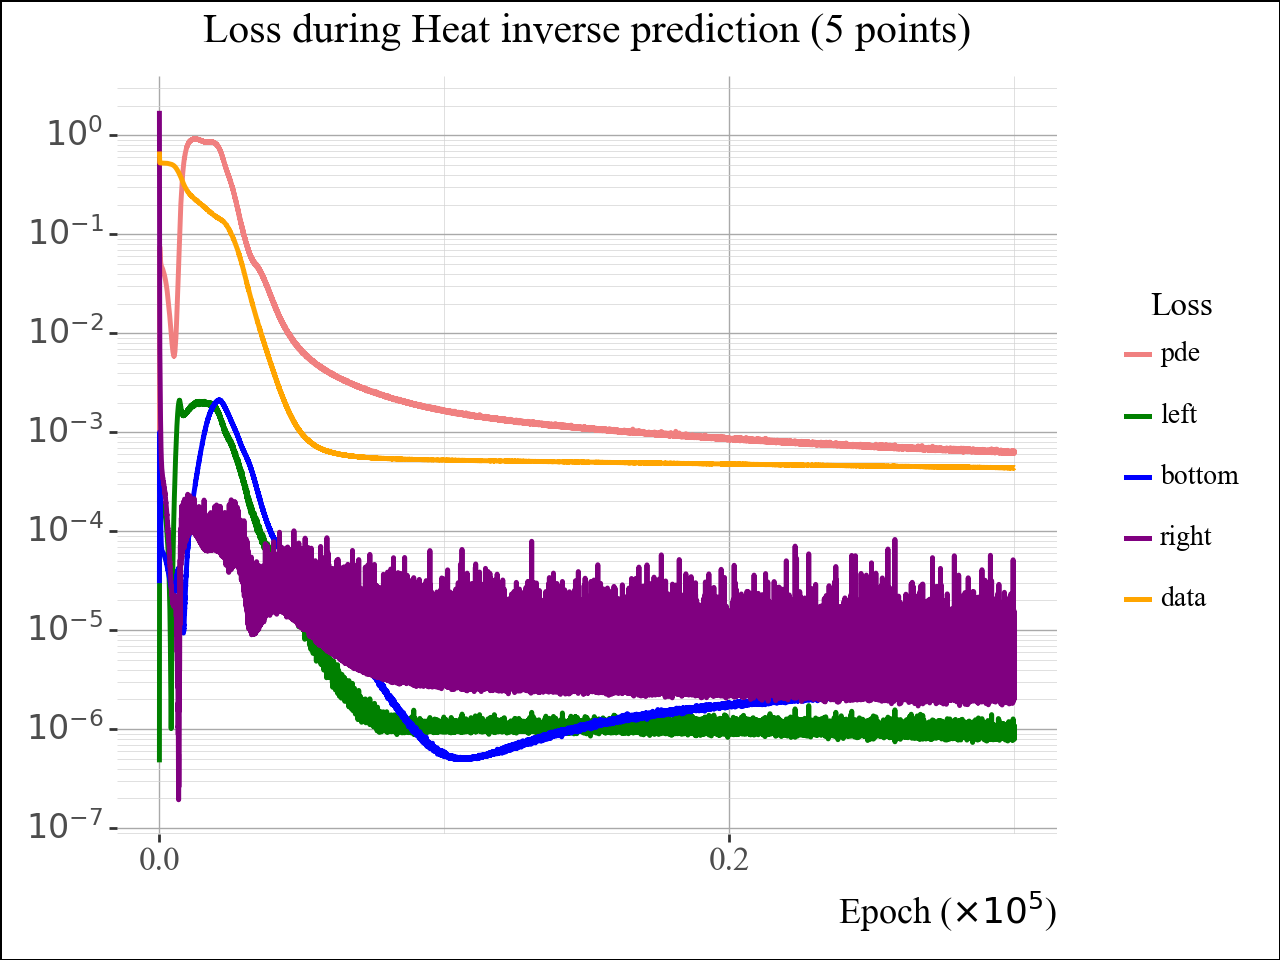

/Users/yst/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 7 x 5 in image.
/Users/yst/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ./result/heat/inverse/normal_5_history.png


In [29]:
show=normal_inverse_5
# nor_u=normal_couple[0]
# new_u=new_couple[0]
# nor_w=normal_couple[1]
# new_w=new_couple[1]
# length=max(len(nor_u),len(new_w),len(new_u),len(nor_w))

# nor_u=np.pad(nor_u, (0, length - len(nor_u)), mode='constant', constant_values=np.nan)
# nor_w=np.pad(nor_w, (0, length - len(nor_w)), mode='constant', constant_values=np.nan)
# new_u=np.pad(new_u, (0, length - len(new_u)), mode='constant', constant_values=np.nan)
# new_w=np.pad(new_w, (0, length - len(new_w)), mode='constant', constant_values=np.nan)
df = pd.DataFrame({
    '1pde': show[1],
    '2left': show[2],
    '3bottom': show[3],
    '4right': show[4],
    '5data': show[6],
    'epoch': np.linspace(1, len(show)+1, len(show))
})

# 转换为长格式
df_long = pd.melt(df, id_vars=['epoch'], value_vars=['1pde','2left','3bottom','4right','5data'], \
                  var_name='Loss', value_name='value',
                    )

def format_ticks(ticks):
    # 初始化一个空列表来存储格式化后的刻度标签
    formatted_ticks = []
    for tick_val in np.atleast_1d(ticks):  # 确保tick_val是一个数组
        if tick_val == 0:
            formatted_ticks.append("0")
            continue
        exponent = np.floor(np.log10(tick_val))
        base_val = tick_val / 10**exponent
        # 判断基数是否为整数，如果是，则不显示小数位；否则，保留一位小数
        if base_val % 1 == 0:
            base_val_str = '{}'.format(int(base_val))
        else:
            base_val_str = '{:.1f}'.format(base_val)
        # 如果基数为1，仅显示指数部分；否则显示基数和指数部分
        if base_val == 1:
            formatted_tick = r'$10^{{{}}}$'.format(int(exponent))
        else:
            formatted_tick = r'${} \times 10^{{{}}}$'.format(base_val_str, int(exponent))
        formatted_ticks.append(formatted_tick)
    # 如果输入是单个刻度值，则返回第一个元素；如果是数组，则返回整个列表
    return formatted_ticks[0] if np.isscalar(ticks) else formatted_ticks

def custom_labels(x):
    return ['{:.1f}'.format(i/1e5) for i in x]
breaks = [0,0.2, 0.4, 0.6, 0.8, 1.0, 1.2,1.4,1.6,1.8,2.0]

plot = (ggplot(df_long, aes(x='epoch', y='value', color='Loss')) +
        geom_line(size=1) + 
        scale_x_continuous(breaks=[i * 1e5 for i in breaks],labels=custom_labels) + 
        scale_y_log10(breaks=[1e2,1e1,1e0,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],labels=format_ticks) +
        theme(text=element_text(family='Times New Roman'),  # 设置字体为Times New Roman
              plot_background=element_rect(fill='white',color='black'),  # 设置绘图背景为浅灰色
              panel_background=element_rect(fill='white',color='black'),  # 设置面板背景为白色
              panel_grid_major=element_line(color='darkgray', size=0.5),  # 添加并自定义主要网格线
              panel_grid_minor=element_line(color='lightgray', size=0.25),
              plot_title=element_text(ha='center', size=15),  # 设置总标题居中并调整大小
              axis_title_x=element_text(ha='right',size=13),
              axis_title_y=element_text(va='top',size=13),  # 设置坐标轴标题的大小
              axis_text=element_text(size=12,family='Times New Roman'),
              legend_background=element_blank(),
              legend_key=element_blank(),
              legend_key_size=10,
              legend_direction='verticle',
              legend_box_just='bottom',
              legend_title_align='center',
              legend_key_height=20,
              legend_box_margin=10,
              legend_text=element_text(size=10,family='Times New Roman'),
              legend_title=element_text(size=12,family='Times New Roman'),
              
              )+ 
        scale_color_manual(values=['lightcoral', 'green', 'blue', 'purple','orange'],  # 手动设置颜色顺序
                       labels=['pde','left','bottom','right','data'])+  # 手动设置标签顺序
        labs(title='Loss during Heat inverse prediction (5 points)', x='Epoch ($\\times 10^5 $)', y='')  
       )

# 显示图形
print(plot)
plot.save(filename='./result/heat/inverse/normal_5_history.png', height=5, width=7, units='in', dpi=300)



<Figure size 862.5x500 with 0 Axes>

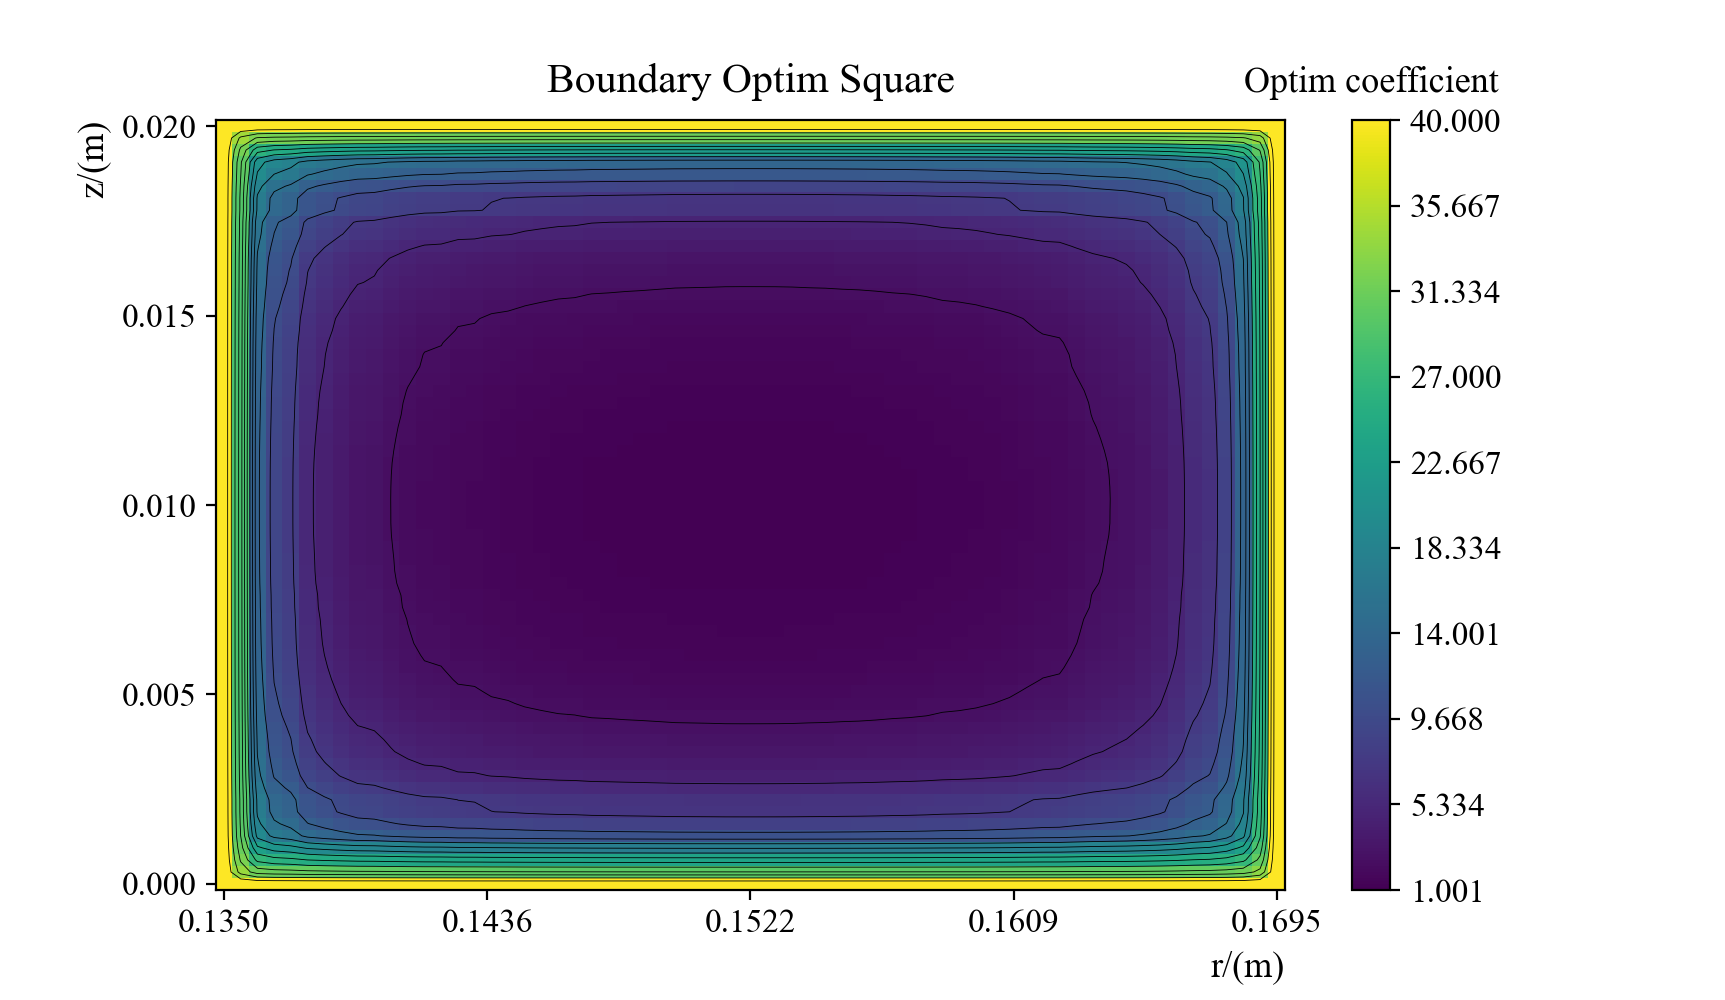

In [18]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=[8.625,5])
check_on_x=torch.linspace(r1, r2, 64)
check_on_y=torch.linspace(0.0, h1, 64)
xx, yy = np.meshgrid(check_on_x, check_on_y)
# 创建热力图
show_array=np.array(bound_optim)
heatmap=plt.pcolormesh(xx, yy,show_array.reshape(xx.shape).T,cmap='viridis')  # cmap是颜色映射，你可以根据需要选择
contour_lines = plt.contour(xx, yy, show_array.reshape(xx.shape).T, 15,colors='black', linewidths=0.3)
# 添加颜色
cbar=plt.colorbar(heatmap)
tick_values = np.linspace(show_array.min(), show_array.max(), 10)
tick_labels = [f'{val:.3f}' for val in tick_values]
# 设置颜色条的刻度值和标签
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_labels,fontsize=12)
cbar.ax.set_title('Optim coefficient', fontsize=13, pad=10)
cbar.ax.xaxis.set_label_position('top')
# 添加轴标签
plt.xlabel('r/(m)', fontname='Times New Roman',fontsize=13,loc='right')
plt.ylabel('z/(m)', fontname='Times New Roman',fontsize=13,loc='top')
plt.title('Boundary Optim Square', fontname='Times New Roman',fontsize=15,pad=10)
plt.xticks(np.linspace(r1, r2, 5), fontname='Times New Roman',fontsize=12)
plt.yticks(np.linspace(0, h1, 5), fontname='Times New Roman',fontsize=12)
ax = plt.gca()  # 获取当前坐标轴
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
plt.savefig('result/force/new/bound_optim' , dpi=400)
plt.show()